# 첫번째 참가자 fMRI, anat 보기

목적은 단순히 사진을 봤을 때와 안 봤을 때 뇌의 차이를 보는 것.

In [1]:
from nilearn import image

bold = image.load_img('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r1_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
bold2 = image.load_img('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/func/sub-ID2207071_task-r2_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')

# F1 구조 이미지
anat = image.load_img('D:/fmri/3. derivatives 폴더에 넣어야 하는 것 (전처리 후 데이터, MNI 템플릿)/fmriprep/sub-ID2207071/anat/sub-ID2207071_desc-preproc_T1w.nii.gz')


In [2]:
print(bold.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  65  77  65 275   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 3. 3. 3. 2. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 2034.6685
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.6.4).'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.5
qoffset_y       : -132.5
q

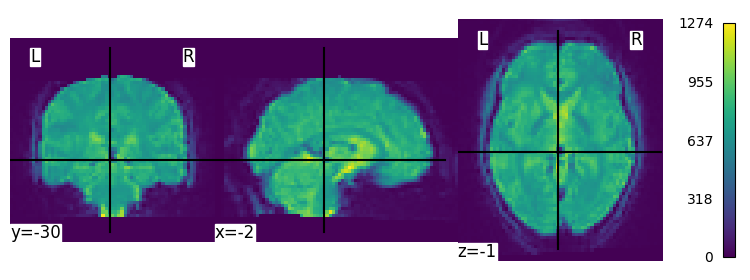

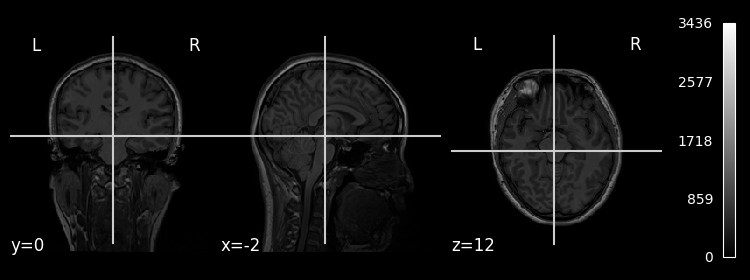

In [3]:
from nilearn.plotting import plot_anat, plot_img, plot_stat_map

# 50초 일때 뇌 시각화
plot_img(bold.slicer[:,:,:,50], colorbar=True, cbar_tick_format = "%i")
plot_anat(anat, colorbar=True, cbar_tick_format = "%i")

In [4]:
# 평균이미지, 이미지 합치기
from nilearn.image import concat_imgs, mean_img

# 이미지 합치기
image_list = [bold, bold2]
fmri_img = concat_imgs(image_list)

In [5]:
print(fmri_img.header)

# 이렇게 각 세션의 2번 시행한 걸 합칠 수 있으나 여기선 사용하지 않음.
# dim의 행벡터에서 5번째 차원이 275에서 550으로 늘어난 것을 볼 수 있다.

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4  65  77  65 550   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1. 3. 3. 3. 2. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 2034.6685
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'xform matrices modified by FixHeaderApplyTransforms (niworkflows v1.6.4).'
aux_file        : b''
qform_code      : mni
sform_code      : mni
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.5
qoffset_y       : -132.5
q

In [6]:
mean_img = mean_img(fmri_img)

## 실험 패러다임 지정

In [150]:
# 실험 자체가 두번에 나뉘어져서 이벤트 파일도 나뉘어져있음.. 우선 1번 시행으로만 해보자.

In [7]:
mean_img = image.mean_img(bold)

In [8]:
print(mean_img.header)

# 이렇게 평균화 하면 275초가 아니라 1초의 이미지. 275초간의 복셀 신호값을 평균화 한 이미지 파일

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 65 77 65  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim          : [1. 3. 3. 3. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : -96.5
qoffset_y       : -132.5
qoffset_z       : -78.5
srow_x          : [  3.    0.    0.  -96.5]
srow_y      

In [9]:
# 이벤트 파일 가져오기
import pandas as pd
events = pd.read_csv('D:/fmri/0. Raw Data/Behavioral_raw/2207071/RCR_R1_2207071.csv')
events

,time,cat,duration,evno,condition,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,stim,...,stim_seq,run_nr,stim_onset,rt,trial_cnt,TimeStamp,subj_id,gender,date,Unnamed: 20
0,10.0,1,4.5,1,task,0,0,0,0,88.jpg,...,1,1,10.044151,1.105750,1,14.509967,2207071,female,2022-07-07_13h09.41.953,NaN
1,14.5,0,3.5,1,NaN,0,1,1,1,NaN,...,1,1,14.516205,NaN,2,18.010550,2207071,female,2022-07-07_13h09.41.953,NaN
2,18.0,1,4.5,1,task,0,2,2,2,15.jpg,...,2,1,18.062219,1.078690,3,22.511603,2207071,female,2022-07-07_13h09.41.953,NaN
3,22.5,0,7.5,1,NaN,0,3,3,3,NaN,...,2,1,22.517053,NaN,4,30.012099,2207071,female,2022-07-07_13h09.41.953,NaN
4,30.0,1,4.5,1,task,0,4,4,4,55.jpg,...,3,1,30.033738,1.550192,5,34.512690,2207071,female,2022-07-07_13h09.41.953,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,528.5,0,5.5,1,NaN,0,115,115,115,NaN,...,58,2,528.581713,NaN,236,534.076715,2207071,female,2022-07-07_13h09.41.953,NaN
236,534.0,1,4.5,1,task,0,116,116,116,25.jpg,...,59,2,534.096868,1.536534,237,538.577113,2207071,female,2022-07-07_13h09.41.953,NaN
237,538.5,0,3.5,1,NaN,0,117,117,117,NaN,...,59,2,538.582500,NaN,238,542.077617,2207071,female,2022-07-07_13h09.41.953,NaN
238,542.0,1,4.5,1,task,0,118,118,118,60.jpg,...,60,2,542.097766,1.371632,239,546.578203,2207071,female,2022-07-07_13h09.41.953,NaN


In [10]:
events = events.loc[0:119,['time','cat','duration']]
events

,time,cat,duration
0,10.0,1,4.5
1,14.5,0,3.5
2,18.0,1,4.5
3,22.5,0,7.5
4,30.0,1,4.5
...,...,...,...
115,528.5,0,5.5
116,534.0,1,4.5
117,538.5,0,3.5
118,542.0,1,4.5


In [11]:
# GLM 함수에 맞게 table을 만들어 준것.

events.columns = ['onset', 'trial_type', 'duration']
events.loc[events['trial_type'] == 1, 'trial_type'] = 'active'
events.loc[events['trial_type'] == 0, 'trial_type'] = 'rest'
events

# 오류는 버전 달라서 나온건데 무시해도됨.

,onset,trial_type,duration
0,10.0,active,4.5
1,14.5,rest,3.5
2,18.0,active,4.5
3,22.5,rest,7.5
4,30.0,active,4.5
...,...,...,...
115,528.5,rest,5.5
116,534.0,active,4.5
117,538.5,rest,3.5
118,542.0,active,4.5


# GML 분석 수행

In [12]:
from nilearn.glm.first_level import FirstLevelModel

In [13]:
fmri_glm = FirstLevelModel(
    t_r = 2,
    noise_model='ar1', # 자기 상관 구조
    standardize=False,
    hrf_model = 'spm',
    drift_model = 'cosine', # 저주파 신호 추정
    high_pass = 0.01 # 주파수가 0.01Hz인 고주파 필터 사용.
)

In [14]:
fmri_glm = fmri_glm.fit(bold, events)

# 이 오류도 실제 실행에 지장은 없음

In [19]:
fmri_glm.design_matrices_

[         active      rest   drift_1   drift_2   drift_3   drift_4   drift_5  \
 0.0    0.000000  0.000000  0.085279  0.085275  0.085268  0.085258  0.085246   
 2.0    0.000000  0.000000  0.085268  0.085230  0.085168  0.085080  0.084967   
 4.0    0.000000  0.000000  0.085246  0.085141  0.084967  0.084724  0.084412   
 6.0    0.000000  0.000000  0.085212  0.085008  0.084667  0.084192  0.083582   
 8.0    0.000000  0.000000  0.085168  0.084830  0.084268  0.083484  0.082479   
 ...         ...       ...       ...       ...       ...       ...       ...   
 540.0  0.576122  0.423878 -0.085168  0.084830 -0.084268  0.083484 -0.082479   
 542.0  0.708686  0.291314 -0.085212  0.085008 -0.084667  0.084192 -0.083582   
 544.0  0.492365  0.507635 -0.085246  0.085141 -0.084967  0.084724 -0.084412   
 546.0  0.440985  0.559015 -0.085268  0.085230 -0.085168  0.085080 -0.084967   
 548.0  0.668379  0.331621 -0.085279  0.085275 -0.085268  0.085258 -0.085246   
 
         drift_6   drift_7   drift_8  

In [15]:
design_matrix = fmri_glm.design_matrices_[0]

In [16]:
design_matrix

,active,rest,drift_1,drift_2,drift_3,drift_4,drift_5,drift_6,drift_7,drift_8,drift_9,drift_10,drift_11,constant
0.0,0.000000,0.000000,0.085279,0.085275,0.085268,0.085258,0.085246,0.085230,0.085212,0.085191,0.085168,0.085141,0.085112,1.0
2.0,0.000000,0.000000,0.085268,0.085230,0.085168,0.085080,0.084967,0.084830,0.084667,0.084480,0.084268,0.084031,0.083770,1.0
4.0,0.000000,0.000000,0.085246,0.085141,0.084967,0.084724,0.084412,0.084031,0.083582,0.083064,0.082479,0.081826,0.081106,1.0
6.0,0.000000,0.000000,0.085212,0.085008,0.084667,0.084192,0.083582,0.082838,0.081962,0.080955,0.079818,0.078554,0.077164,1.0
8.0,0.000000,0.000000,0.085168,0.084830,0.084268,0.083484,0.082479,0.081256,0.079818,0.078169,0.076314,0.074257,0.072005,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540.0,0.576122,0.423878,-0.085168,0.084830,-0.084268,0.083484,-0.082479,0.081256,-0.079818,0.078169,-0.076314,0.074257,-0.072005,1.0
542.0,0.708686,0.291314,-0.085212,0.085008,-0.084667,0.084192,-0.083582,0.082838,-0.081962,0.080955,-0.079818,0.078554,-0.077164,1.0
544.0,0.492365,0.507635,-0.085246,0.085141,-0.084967,0.084724,-0.084412,0.084031,-0.083582,0.083064,-0.082479,0.081826,-0.081106,1.0
546.0,0.440985,0.559015,-0.085268,0.085230,-0.085168,0.085080,-0.084967,0.084830,-0.084667,0.084480,-0.084268,0.084031,-0.083770,1.0


<Axes: label='conditions', ylabel='scan number'>

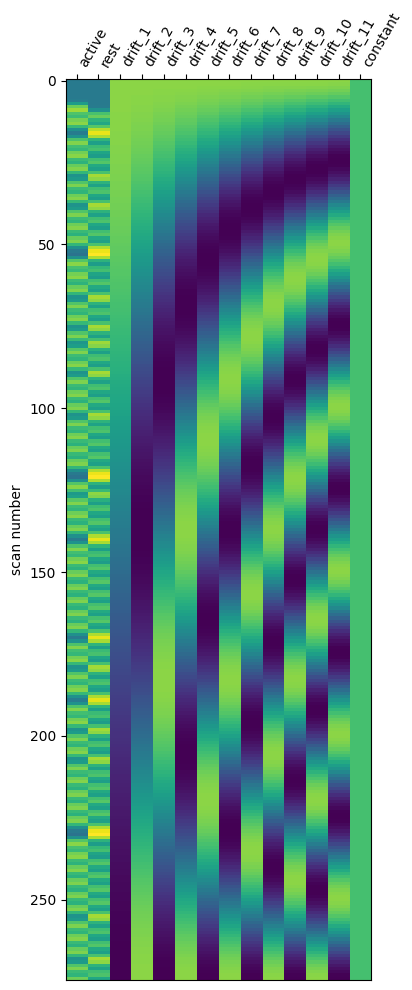

In [15]:
from nilearn.plotting import plot_design_matrix

plot_design_matrix(design_matrix)

# 아래그래프는 GLM의 하나의 식으로 볼 수 있다.
# Y(fMRI 신호) = active * coef1 + rest * coef2 + drift_1 * coef3 + ... + constant + error

Text(0.5, 1.0, 'Response')

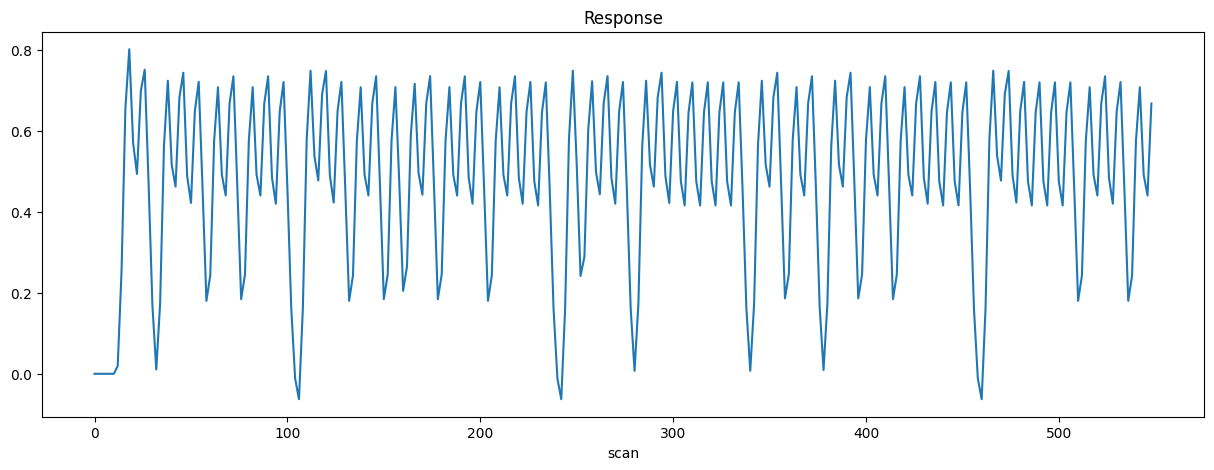

In [16]:
# 두번째 열이 task 였는데 한번 보자.
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(design_matrix["active"])
plt.xlabel('scan')
plt.title("Response")



# 중요 효과있는 복셀 감지
GLM의 베타인 estimated coef를 얻기 위해 single '1' in each columns 만들었음.
모델의 일부 열을 선택하고 이에 대한 통계 분석하기 위해.

In [17]:
import numpy as np

conditions = {"active": np.zeros(14), "rest": np.zeros(14)}
conditions["active"][0] = 1
conditions["rest"][1] = 1
conditions

{'active': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'rest': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [18]:
active_minus_rest = conditions["active"] - conditions['rest']
active_minus_rest

array([ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.])

<Axes: label='conditions'>

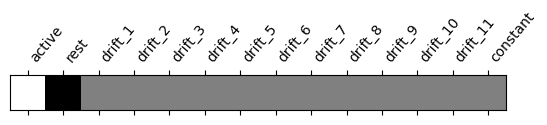

In [19]:
from nilearn.plotting import plot_contrast_matrix

plot_contrast_matrix(active_minus_rest, design_matrix=design_matrix)

# active일 떄는 1, rest일 때는 -1, 나머지 저주파 신호, 상수는 0으로 설정

이제 추정된 효과 estimated effect를 계산해보자. 이 값은 BOLD 신호 단위로 표시되지만, 관련 분산을 고려하지 않아서 통계적 보증은 없음

In [20]:
eff_map = fmri_glm.compute_contrast(
    active_minus_rest, output_type="effect_size"
)

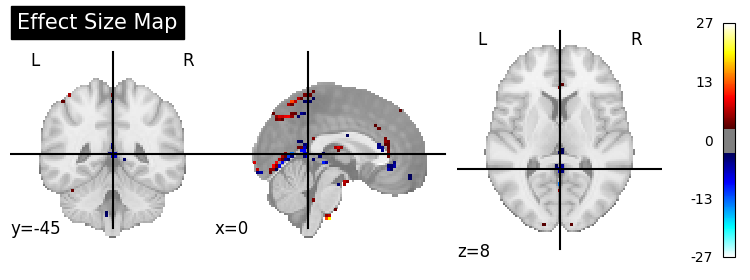

In [21]:
plot_stat_map(eff_map, threshold=3.0, title="Effect Size Map")

# active =1, rest=-1로 부호화 했으므로, 해당 복셀 또는 뇌 영역에서 활성 상태와 휴식 상태간의 차이를 나타냄
# 파란점은 휴식상태일때, 빨간점을 활성 상태일 때 각각 더 활성화 되는 것

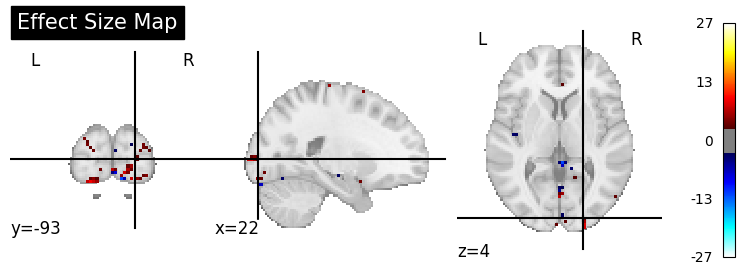

In [22]:
from nilearn.plotting import plot_stat_map

# eff_map 시각화
# 원하는 좌표
plot_stat_map(eff_map, cut_coords=(22,-93,4), threshold=3.0, title="Effect Size Map")


## 통계적 유의성 얻기.
t-test하고, z-score로 변환. 만약 데이터 효과 없다면, 점수들은 공간내에서 일반적으로 표준 정규분포 따를 것.
그러니까 t통계량을 z-점수로 반환하여 그 값들이 표준 정규분포와 어떻게 일치하는지 다른지 확인

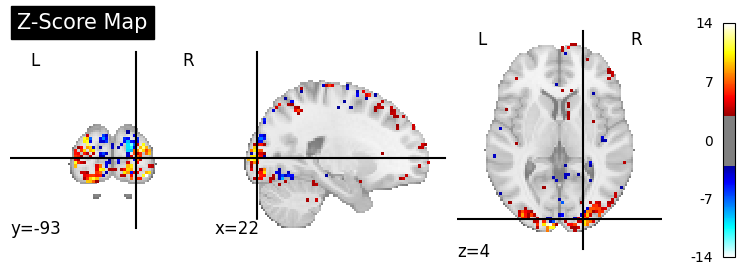

In [23]:
z_map = fmri_glm.compute_contrast(active_minus_rest, output_type='z_score')

from nilearn.plotting import plot_stat_map

# z_map 시각화
plot_stat_map(z_map, threshold=3.0, title="Z-Score Map")


# Plot thresholded z scores map
시리즈의 평균 fMRI 위에 표시. 임의로 z-스케일에서 3.0임계값 사용. 나중에 보정된 임계값 사용하는 법 알아 볼 것.

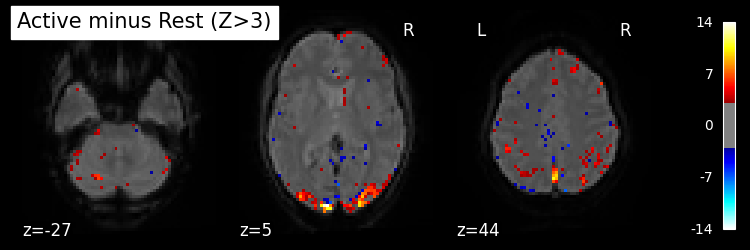

In [24]:
plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=3.0,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (Z>3)",
)
plt.show()

위에서 임계값을 썻는데, 이 임계값은 타입 1오류 탐지의 위험을 일정수준에서 관리하는 일 부 보장을 제공해야함.
한가지 제안은 거짓 양성률을 특정 수준, 예를 들어 0.001로 제어하는 것, 이것은 비활성 복셀을 활성으로 잘못간주할 확률이 0.1이라는 것. 여기서 fpr이 false psitive rate

Uncorrected p<0.001 threshold: 3.291


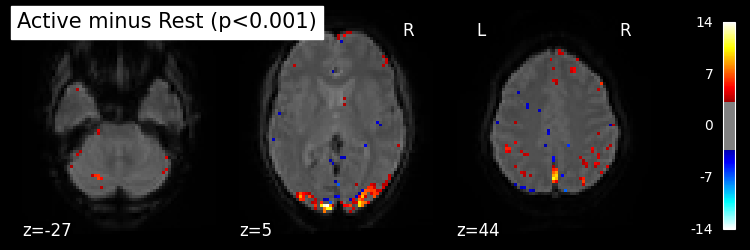

In [25]:
from nilearn.glm import threshold_stats_img

_, threshold = threshold_stats_img(z_map, alpha=0.001, height_control="fpr")
print(f"Uncorrected p<0.001 threshold: {threshold:.3f}")
plot_stat_map(
    z_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (p<0.001)",
)
plt.show()

isloated voxel 말고 cluster로 모여있는 복셀만 보기.

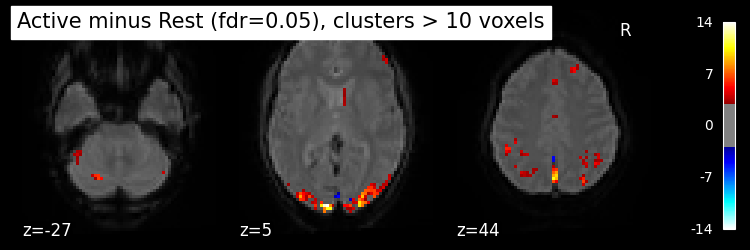

In [26]:
# 10개의 임계값
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr", cluster_threshold=10
)
plot_stat_map(
    clean_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Active minus Rest (fdr=0.05), clusters > 10 voxels",
)
plt.show()

In [ ]:
# 추출하기
# z_map.to_filename(join(outdir, "active_vs_rest_z_map.nii.gz"))
# eff_map.to_filename(join(outdir, "active_vs_rest_eff_map.nii.gz"))

In [27]:
# position 뽑기
from nilearn.reporting import get_clusters_table

table = get_clusters_table(
    z_map, stat_threshold=threshold, cluster_threshold=20
)
table
# 고유 식별자
# 좌표
# 가장 높은 픽셀 값(여기선 z값)
# 클러스터 크기. 클러스터 내의 보클(3D 볼륨 픽셀) 수

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,32.5,-93.5,-12.5,13.903180,11394
1,1a,26.5,-93.5,11.5,12.408813,
2,1b,23.5,-99.5,2.5,11.829145,
3,1c,17.5,-90.5,-6.5,11.041083,
4,2,-9.5,-99.5,5.5,13.811842,8694
5,2a,-6.5,-99.5,-6.5,13.170703,
6,2b,-24.5,-93.5,17.5,11.720707,
7,2c,-12.5,-102.5,-3.5,11.217933,
8,3,41.5,-69.5,-21.5,11.714906,2592
9,3a,35.5,-78.5,-18.5,9.377514,


In [ ]:
# 파일로 다운
# table.to_csv(join(outdir, "table.csv"))

## Perfomrning an F-test
t-test는 단순히 활성 vs 휴식.. condition vs baselin임.
F-test를 사용하면 특정 조건 조합(2차원, 3차원) 차원 또는 더 높은 차원이 신호의 상당 부분을 설명하는지 여부를 찾는것.
예를 들어 활성 상태와 휴식 상태의 조합으로 어떤 복셀이 잘 설명되는지 테스트 하는 것.

<Axes: label='conditions'>

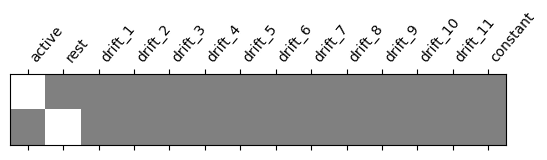

In [28]:
# contrast 만들기
effects_of_interest = np.vstack((conditions["active"], conditions["rest"]))
plot_contrast_matrix(effects_of_interest, design_matrix)

In [29]:
effects_of_interest

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
# 대조행렬 시각화
z_map = fmri_glm.compute_contrast(effects_of_interest, output_type="z_score")

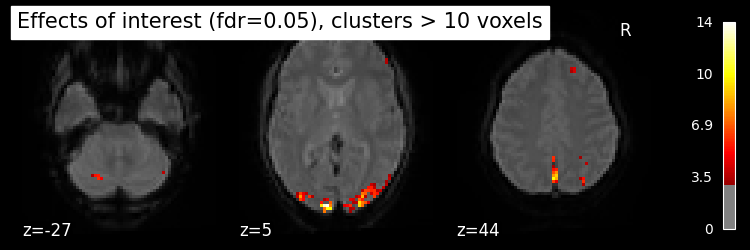

In [31]:
clean_map, threshold = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr", cluster_threshold=10
)
plot_stat_map(
    clean_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="Effects of interest (fdr=0.05), clusters > 10 voxels",
)
plt.show()

In [32]:
# position 뽑기
from nilearn.reporting import get_clusters_table

table = get_clusters_table(
    z_map, stat_threshold=threshold, cluster_threshold=20
)
table
# 고유 식별자
# 좌표
# 가장 높은 픽셀 값(여기선 z값)
# 클러스터 크기. 클러스터 내의 보클(3D 볼륨 픽셀) 수

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,32.5,-93.5,-12.5,13.833428,9477
1,1a,26.5,-93.5,11.5,12.163715,
2,1b,17.5,-93.5,17.5,11.837477,
3,1c,23.5,-99.5,2.5,11.557560,
4,2,-9.5,-99.5,5.5,13.619507,9180
5,2a,-6.5,-99.5,-6.5,12.999269,
6,2b,-3.5,-99.5,2.5,12.979072,
7,2c,-24.5,-93.5,17.5,11.581522,
8,3,41.5,-69.5,-21.5,11.528878,1971
9,3a,35.5,-78.5,-18.5,9.089396,
